In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('credit_card_fraud_dataset.csv') #dataset loading

In [5]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688.0,refund,San Antonio,0.0
1,2,2024-03-19 13:20:35.462824,2659.71,109.0,refund,Dallas,0.0
2,3,2024-01-08 10:08:35.462834,784.00,394.0,purchase,New York,0.0
3,4,2024-04-13 23:50:35.462850,3514.40,944.0,purchase,Philadelphia,0.0
4,5,2024-07-12 18:51:35.462858,369.07,475.0,purchase,Phoenix,0.0


In [6]:
df.isnull() #finding null values

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
16514,False,False,False,False,False,False,False
16515,False,False,False,False,False,False,False
16516,False,False,False,False,False,False,False
16517,False,False,False,False,False,False,False


In [7]:
df.shape #find the shape

(16519, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    16519 non-null  int64  
 1   TransactionDate  16519 non-null  object 
 2   Amount           16518 non-null  float64
 3   MerchantID       16518 non-null  float64
 4   TransactionType  16518 non-null  object 
 5   Location         16518 non-null  object 
 6   IsFraud          16518 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 903.5+ KB


In [9]:
df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,16519.000000,16518.000000,16518.000000,16518.000000
mean,8260.000000,2502.518003,503.377225,0.010716
std,4768.768884,1450.055806,288.920397,0.102963
min,1.000000,1.070000,1.000000,0.000000
25%,4130.500000,1242.637500,254.000000,0.000000
50%,8260.000000,2499.415000,504.000000,0.000000
75%,12389.500000,3756.257500,756.000000,0.000000
max,16519.000000,4999.420000,1000.000000,1.000000


In [10]:
#checking for duplicate values
df.nunique()

,0
TransactionID,16519
TransactionDate,16519
Amount,16252
MerchantID,1000
TransactionType,2
Location,10
IsFraud,2


<ipython-input-11-2a5d6c8338ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsFraud', data=df, palette='Set2')


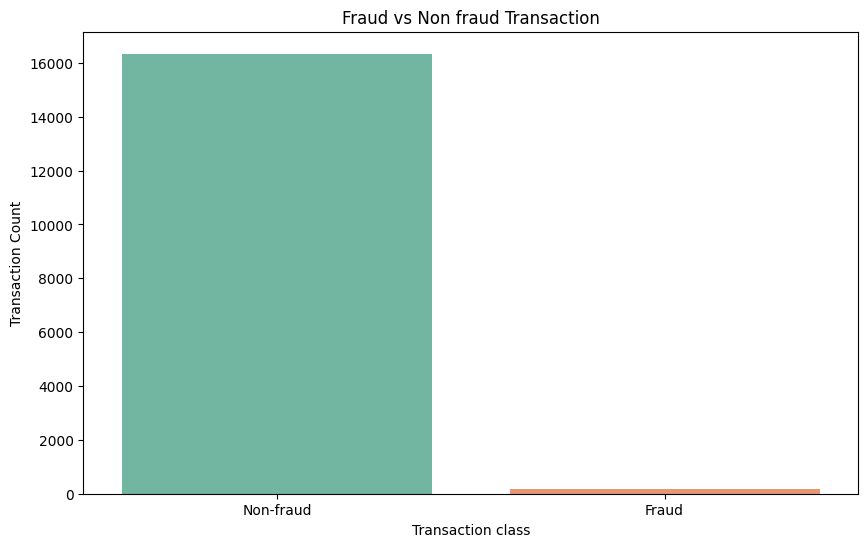

In [11]:
#bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='IsFraud', data=df, palette='Set2')
plt.xticks([0, 1], ['Non-fraud', 'Fraud'])
plt.xlabel('Transaction class')
plt.ylabel('Transaction Count')
plt.title('Fraud vs Non fraud Transaction')
plt.show()

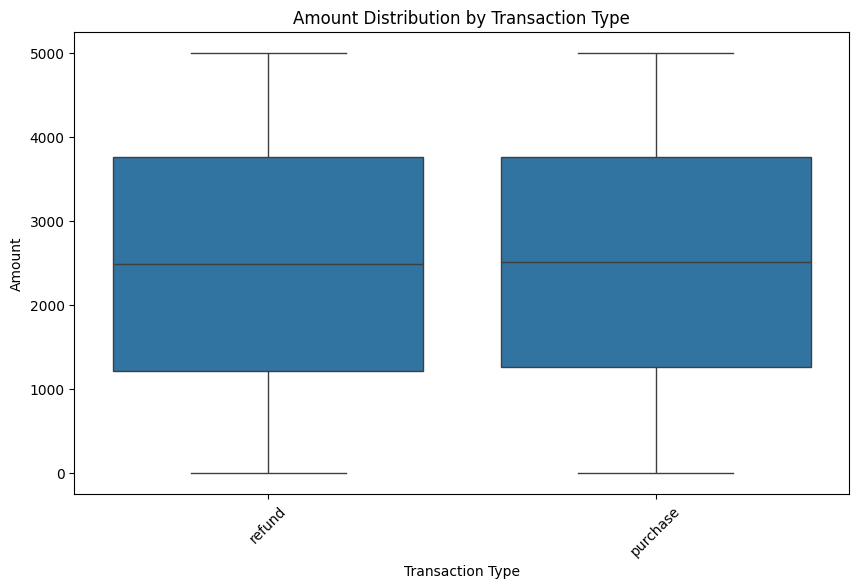

In [12]:
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='Amount', data=df)
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.title('Amount Distribution by Transaction Type')
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-1b3e4c81838d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsFraud', y='Amount', data=df,palette='Set2')


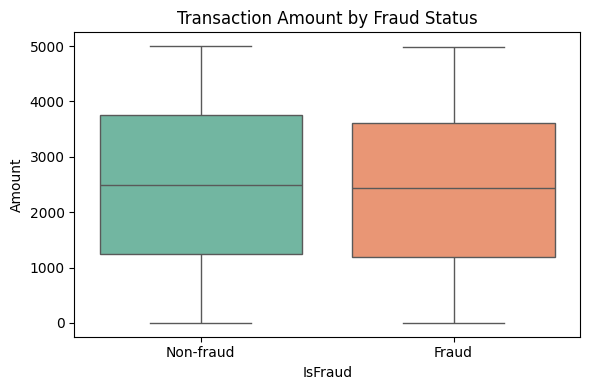

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='IsFraud', y='Amount', data=df,palette='Set2')
plt.title('Transaction Amount by Fraud Status')
plt.xticks([0, 1], ['Non-fraud', 'Fraud'])
plt.tight_layout()
plt.show()

In [14]:
#dependent variable
y=df['IsFraud']
#independent variables
x=df.drop(['IsFraud'],axis=1)

print("Independent variable shape:",x.shape)
print("Dependent variable shape:",y.shape)


Independent variable shape: (16519, 6)
Dependent variable shape: (16519,)


In [15]:
y=df['IsFraud']
y

,IsFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
16514,0.0
16515,0.0
16516,0.0
16517,0.0


In [16]:
#Machine learning model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [17]:
x=df.drop(columns=['IsFraud'])
y=df['IsFraud']

In [18]:
x['TransactionDate']=pd.to_datetime(x['TransactionDate'],errors='coerce')
x['Hour']=x['TransactionDate'].dt.hour
x['Dayofweek']=x['TransactionDate'].dt.dayofweek
x=x.drop(columns=['TransactionDate','TransactionID'])

In [19]:
numeric_features=['Amount','MerchantID','Hour','Dayofweek']
categorical_features=['TransactionType','Location']

In [20]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), ["Amount", "Hour"]),
    ("cat", OneHotEncoder(), ["Dayofweek"])
])

In [29]:
model=Pipeline(steps=[('preprocessor',preprocessor),
                      ('classifier',LogisticRegression(class_weight='balanced', max_iter=1000))])

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]


In [33]:
x_train.isnull().sum()


,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
Hour,0
Dayofweek,0


In [34]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Amount', 'Hour']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Dayofweek'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [35]:
y_pred=model.predict(x_test)

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1702 1571]
 [  15   16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.52      0.68      3273
         1.0       0.01      0.52      0.02        31

    accuracy                           0.52      3304
   macro avg       0.50      0.52      0.35      3304
weighted avg       0.98      0.52      0.68      3304



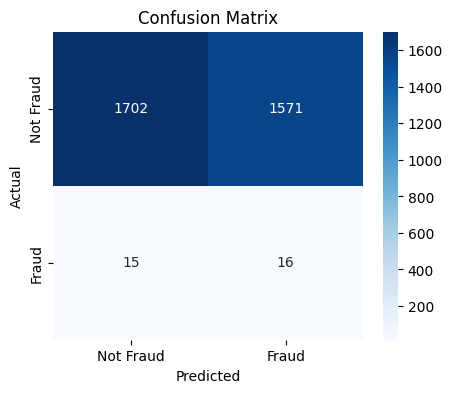

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [39]:
comparision_of_actual_and_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comparision_of_actual_and_predicted

,Actual,Predicted
322,0.0,0.0
8893,0.0,0.0
4463,0.0,1.0
6270,0.0,0.0
4554,0.0,0.0
...,...,...
8046,0.0,0.0
3481,0.0,1.0
7019,0.0,0.0
119,0.0,0.0
